<a href="https://colab.research.google.com/github/Mago281/deep-learning-challenge/blob/main/deep_learning_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

# Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
print(application_df.columns)

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis = 1, inplace = True)

In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df['APPLICATION_TYPE'].value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_count[app_type_count < 528].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,'Other')

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_count = application_df['CLASSIFICATION'].value_counts()
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_count[class_count > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_count[class_count < 780].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,'Other')

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_app_df = pd.get_dummies(application_df)
numeric_app_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
# Class 2 Activity 2

# Split our preprocessed data into our features and target arrays
y = numeric_app_df['IS_SUCCESSFUL']
X = numeric_app_df.drop(['IS_SUCCESSFUL'], axis = 1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [12]:
# Class 1 Activity 03

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

##1st Attempt:
###Hidden layers 1 & 2 = 80, 30 respectively with activation = 'relu'.
##activation = 'sigmoid' was used for the Output layer.  
###Epochs = 100.

In [13]:
# Class 2 Activity 2

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
hidden_node_layer1 = 80
hidden_node_layer2 = 30
number_input_features = len(X_train_scaled[0])

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_node_layer1, activation = 'relu', input_dim = number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_node_layer2, activation = 'relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5981 (23.36 KB)
Trainable params: 5981 (23.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Class 2 Activity 2

# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
# Class 2 Activity 2

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs = 100)

Epoch 1/100
804/804 [==============================] - 5s 3ms/step - loss: 0.5713 - accuracy: 0.7213
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5549 - accuracy: 0.7278
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5522 - accuracy: 0.7311
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5511 - accuracy: 0.7306
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5496 - accuracy: 0.7297
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5479 - accuracy: 0.7322
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5479 - accuracy: 0.7329
Epoch 8/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5476 - accuracy: 0.7325
Epoch 9/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5465 - accuracy: 0.7329
Epoch 10/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5463 - accura

In [26]:
# Evaluate the model using the test data (Class 1 Activity 03, Class 2 Activity 04)
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose = 0)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.5653319954872131, Accuracy: 0.7279300093650818


###Target predictive accuracy higher than 75% was not reached

<Axes: >

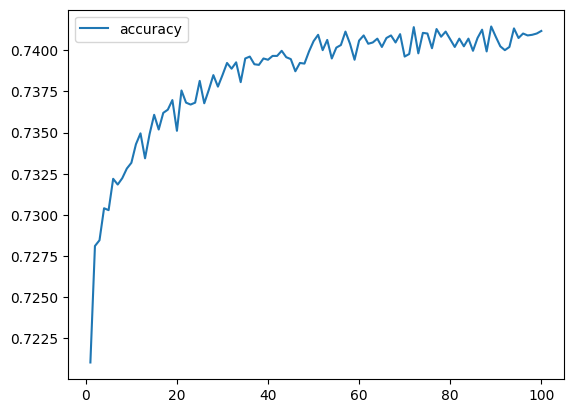

In [27]:
# Plot the accuracy
attempt1_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
attempt1_df.plot(y = 'accuracy')

##2nd Attempt:
###Increased Hidden layers to 4 with node values of 110, 90, 60 & 40 and activation function was changed to 'tanh'.
##Activation function for the Output layer was kept as 'sigmoid' .  

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
hidden_node_layer1 = 110
hidden_node_layer2 =  90
hidden_node_layer3 =  60
hidden_node_layer4 =  40
number_input_features = len(X_train_scaled[0])

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_node_layer1, input_dim = number_input_features, activation = 'tanh'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_node_layer2, activation = 'tanh'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_node_layer3, activation = 'tanh'))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_node_layer4, activation = 'tanh'))


# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 110)               4840      
                                                                 
 dense_14 (Dense)            (None, 90)                9990      
                                                                 
 dense_15 (Dense)            (None, 60)                5460      
                                                                 
 dense_16 (Dense)            (None, 40)                2440      
                                                                 
 dense_17 (Dense)            (None, 1)                 41        
                                                                 
Total params: 22771 (88.95 KB)
Trainable params: 22771 (88.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [23]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs = 100)

Epoch 1/100
804/804 [==============================] - 5s 4ms/step - loss: 0.5689 - accuracy: 0.7210
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5568 - accuracy: 0.7281
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5532 - accuracy: 0.7285
Epoch 4/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5510 - accuracy: 0.7304
Epoch 5/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5489 - accuracy: 0.7303
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5475 - accuracy: 0.7322
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5467 - accuracy: 0.7318
Epoch 8/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5462 - accuracy: 0.7322
Epoch 9/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5444 - accuracy: 0.7328
Epoch 10/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5443 - accura

In [29]:
# Evaluate the model using the test data (Class 1 Activity 03, Class 2 Activity 04)
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose = 0)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.5653319954872131, Accuracy: 0.7279300093650818


###Despite making modifications to increase model performance, target predictive accuracy remained the same as the first attempt.

<Axes: >

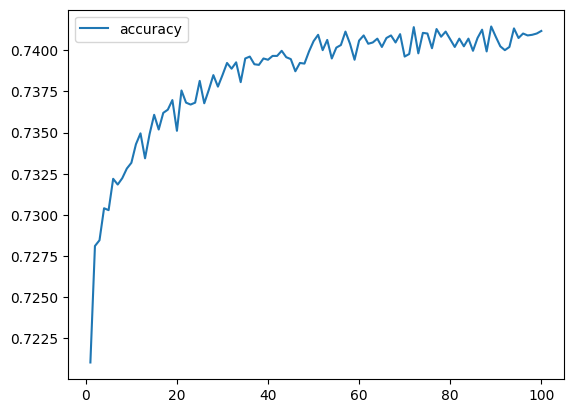

In [30]:
# Plot the accuracy
attempt2_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
attempt2_df.plot(y = 'accuracy')

##3rd Attempt:
###Hidden layers were increased to 6 with node values of 100, 95, 70, 50, 40 & 30.
Hidden layer functions were changed to 'sigmoid'

In [31]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
hidden_node_layer1 = 100
hidden_node_layer2 = 95
hidden_node_layer3 = 70
hidden_node_layer4 = 50
hidden_node_layer5 = 40
hidden_node_layer6 = 30
number_input_features = len(X_train_scaled[0])

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_node_layer1, input_dim = number_input_features, activation = 'sigmoid'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_node_layer2, activation = 'sigmoid'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_node_layer3, activation = 'sigmoid'))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_node_layer4, activation = 'sigmoid'))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_node_layer5, activation = 'sigmoid'))

# Sixth hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_node_layer6, activation = 'sigmoid'))


# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               4400      
                                                                 
 dense_19 (Dense)            (None, 95)                9595      
                                                                 
 dense_20 (Dense)            (None, 70)                6720      
                                                                 
 dense_21 (Dense)            (None, 50)                3550      
                                                                 
 dense_22 (Dense)            (None, 40)                2040      
                                                                 
 dense_23 (Dense)            (None, 30)                1230      
                                                                 
 dense_24 (Dense)            (None, 1)                

In [36]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [37]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs = 100)

Epoch 1/100
804/804 [==============================] - 5s 4ms/step - loss: 0.5346 - accuracy: 0.5318
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5344 - accuracy: 0.5318
Epoch 3/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5343 - accuracy: 0.5318
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5342 - accuracy: 0.5318
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5344 - accuracy: 0.5318
Epoch 6/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5342 - accuracy: 0.5318
Epoch 7/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5340 - accuracy: 0.5318
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5338 - accuracy: 0.5318
Epoch 9/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5334 - accuracy: 0.5318
Epoch 10/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5336 - accura

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose = 0)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.5804160833358765, Accuracy: 0.5343440175056458


<Axes: >

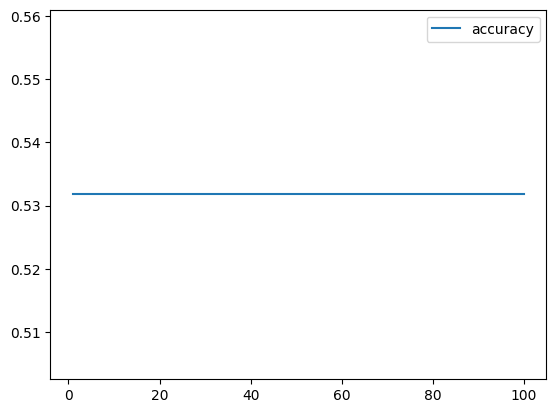

In [39]:
# Plot the accuracy
attempt3_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
attempt3_df.plot(y = 'accuracy')

###Still unable to reach our target predictive accuracy higher than 75% despite making modifications.
###Please refer to the AlphabetSoupCharity_Optimisation file where another attempt was made to reach our target.

In [40]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
